# Data Collection

In [ ]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
PATH = os.path.join("datasets", "titanic")
URL = DOWNLOAD_ROOT + "datasets/titanic/train.csv"

def fetch_titanic_data(url=URL, path=PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    csv_path = os.path.join(path, "titanic.csv")
    urllib.request.urlretrieve(url, csv_path)


def load_titanic_data(path=PATH):
    csv_path = os.path.join(path, "titanic.csv")
    return pd.read_csv(csv_path)



See the column explanation: https://www.kaggle.com/c/titanic/data

In [ ]:
fetch_titanic_data()
titanic = load_titanic_data()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preparation

## Separate survival label from the data

In [ ]:
df = pd.DataFrame(titanic)
X= df.drop('Survived', axis=1)
label= df['Survived'].copy()

In [ ]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Drop the following columns: PassengerId, Name, Ticket, and Cabin

In [ ]:
X= X.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
label.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Fill the missing age with its median.

In [ ]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
age_median = X['Age'].median()
X['Age'].fillna(age_median, inplace=True)
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## One-hot encode the following columns: pclass, sex, and embarked.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_cat = ['Pclass','Sex','Embarked']
X_cat = X[onehot_cat]

In [ ]:
X_cat

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
886,2,male,S
887,1,female,S
888,3,female,S
889,1,male,C


In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
cat_df = pd.DataFrame(X_cat_1hot, columns=cat_encoder.get_feature_names_out())
X= pd.concat([X, cat_df], axis=1).drop(onehot_cat, axis=1)

In [ ]:
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,19.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
888,28.0,1,2,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Scale the features with standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_transform = pd.DataFrame(scaler.fit_transform(X.values[:,[0,3]]), columns=X.columns[[0,3]], index=X.index)
X.drop(X.columns[[0,3]], axis=1, inplace=True)
scaled_X = pd.concat([X, X_transform], axis=1)

In [ ]:
scaled_X

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age,Fare
0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.565736,-0.502445
1,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.663861,0.786845
2,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.258337,-0.488854
3,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.433312,0.420730
4,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.181487,-0.386671
887,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.796285,-0.044381
888,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.104637,-0.176263
889,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.258337,-0.044381


In [ ]:
cols = scaled_X.columns.tolist()
cols = cols[-2:] + cols[:-2]
scaled_X = scaled_X[cols]
scaled_X

,Age,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,-0.565736,-0.502445,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.663861,0.786845,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.258337,-0.488854,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.433312,0.420730,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.433312,-0.486337,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,-0.796285,-0.044381,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
888,-0.104637,-0.176263,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
889,-0.258337,-0.044381,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Compare different classification algorithms:

## Data Preparation

In [ ]:
X = scaled_X.copy().to_numpy()
y = label.to_numpy()

# classification into 2 labels
# label count is already 2, to maintain flexibility, we still do the split using median
y_cat = y.copy()
y_cat[y > np.median(y)] = 1
y_cat[y <= np.median(y)] = 0

print(f'Features shape:{X.shape}\nTarget Shape:{y.shape}')
print(f'Label shape:\n1:{y_cat[y_cat == 1].shape}\n0:{y_cat[y_cat == 0].shape}')

Features shape:(891, 13)
Target Shape:(891,)
Label shape:
1:(342,)
0:(549,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_cat_train, y_cat_test  = train_test_split(X, y, y_cat, test_size=0.2, random_state=15)
print(X_train.shape, y_train.shape, y_cat_train.shape)
print(X_test.shape, y_test.shape, y_cat_test.shape)

(712, 13) (712,) (712,)
(179, 13) (179,) (179,)


In [ ]:
mean_time= []
mean_accuracy= []
mean_f1= []

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(log_reg, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.0183146  0.01312041 0.01383376 0.01263118 0.01394057]
Mean: 0.014368104934692382
Std: 0.0020306049015166978

Accuracy: [0.7877095  0.78651685 0.78651685 0.76966292 0.83146067]
Mean: 0.7923733601154981
Std: 0.02065880487624462

F1: [0.72058824 0.71641791 0.72058824 0.672      0.765625  ]
Mean: 0.7190438762071993
Std: 0.02964656192055655


## K-Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(knn, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

Time: [0.00203228 0.00229692 0.001899   0.0019443  0.00135541]
Mean: 0.0019055843353271485
Std: 0.0003077120959167897

Accuracy: [0.79888268 0.76966292 0.8258427  0.82022472 0.80337079]
Mean: 0.8035967610319503
Std: 0.01972384204728766

F1: [0.72307692 0.6962963  0.76335878 0.73770492 0.73684211]
Mean: 0.7314558042590237
Std: 0.021873546054384754


### Hyperparameter Selection using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [2,4,6,8,10], 'weights': ['uniform', 'distance']}]

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5,
                  scoring='accuracy', return_train_score=True)
grid_search.fit(X, y_cat)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 4, 6, 8, 10],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
grid_search.best_score_

0.8103383340656581

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.model_selection import cross_validate
knn = grid_search.best_estimator_
scores = cross_validate(knn, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.00230694 0.00245261 0.00133276 0.0012908  0.00127673]
Mean: 0.0017319679260253905
Std: 0.0005312544750066672

Accuracy: [0.79888268 0.79775281 0.81460674 0.80337079 0.83707865]
Mean: 0.8103383340656581
Std: 0.014638565664657403

F1: [0.68965517 0.71875    0.736      0.69565217 0.768     ]
Mean: 0.7216114692653673
Std: 0.02850334552445092


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(tree_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.00317192 0.0020175  0.00211024 0.00187898 0.00211024]
Mean: 0.0022577762603759764
Std: 0.00046484730038375184

Accuracy: [0.76536313 0.80337079 0.80898876 0.73595506 0.79775281]
Mean: 0.7822861088443914
Std: 0.027675866547224405

F1: [0.69117647 0.74452555 0.75362319 0.62992126 0.74285714]
Mean: 0.71242072182779
Std: 0.046716631393335914


### Visualizing the Decision Tree

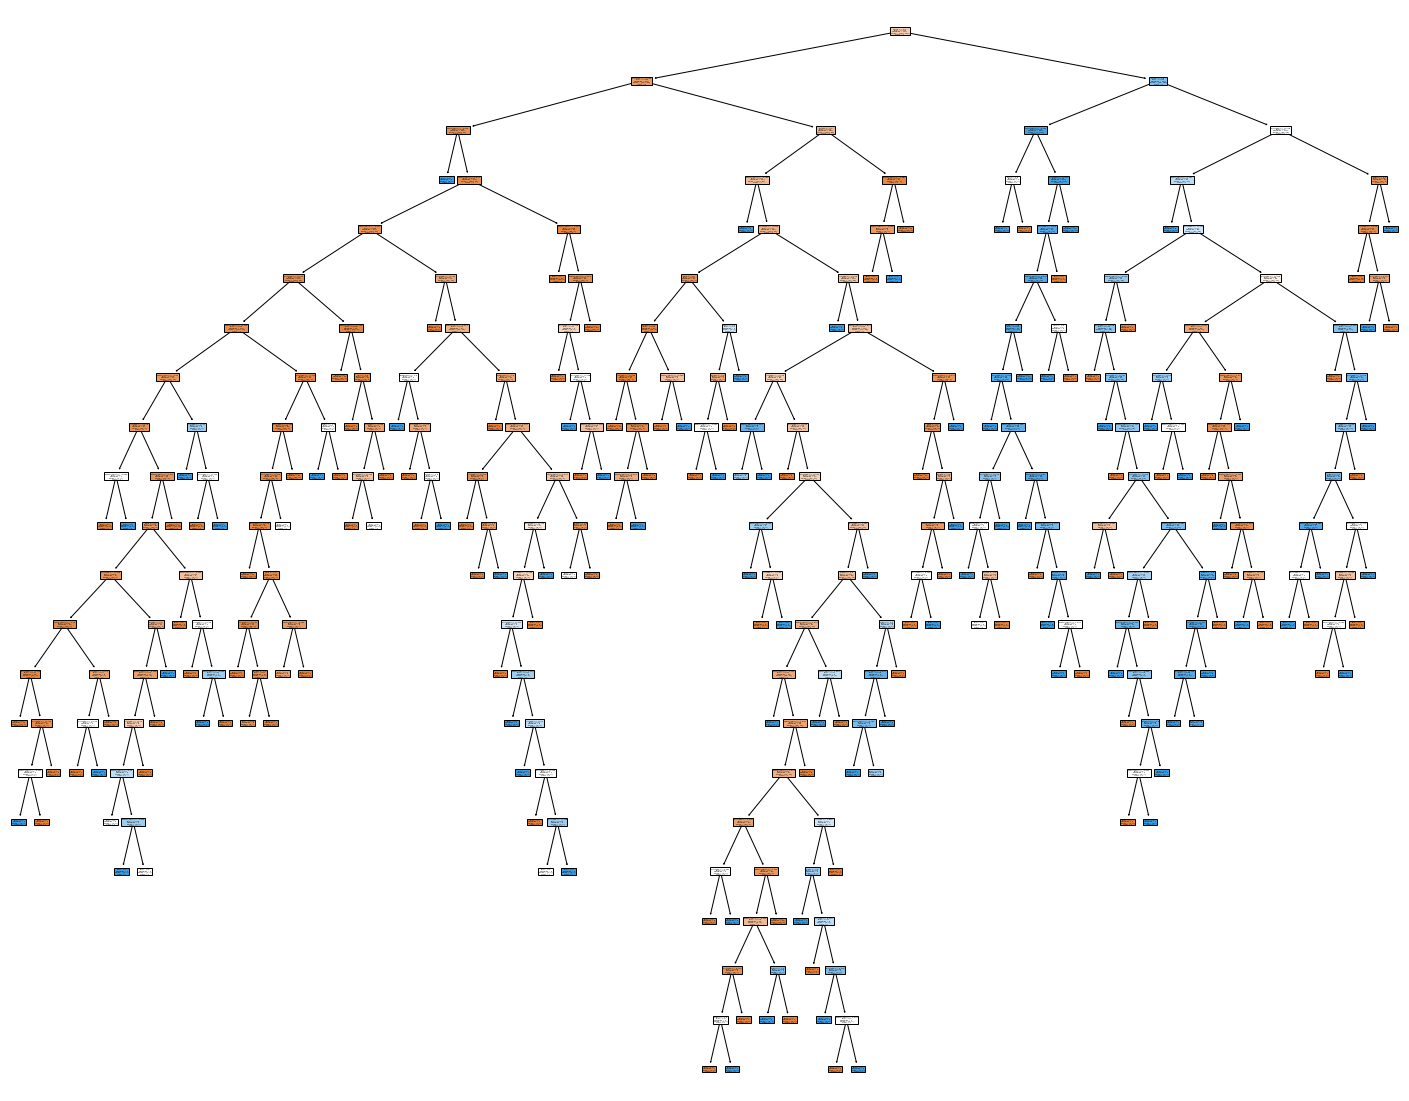

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

tree_class.fit(X_train,y_cat_train)
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(tree_class, feature_names=titanic.columns, class_names='Survived', filled=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
forest_class = RandomForestClassifier()

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(forest_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.30064678 0.17842007 0.17804384 0.16942453 0.17170811]
Mean: 0.19964866638183593
Std: 0.050620577339238464

Accuracy: [0.79888268 0.80337079 0.84831461 0.78651685 0.84269663]
Mean: 0.815956311593748
Std: 0.02481406779432574

F1: [0.73529412 0.73684211 0.8        0.69354839 0.8       ]
Mean: 0.7531369220013981
Std: 0.04129643173652111


## XGBoost

In [ ]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier()

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(xgb_class, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.06664371 0.04705238 0.04724503 0.04685712 0.05372691]
Mean: 0.05230503082275391
Std: 0.007622247840597492

Accuracy: [0.80446927 0.81460674 0.82022472 0.80898876 0.84831461]
Mean: 0.8193208210407381
Std: 0.015433723109464765

F1: [0.72868217 0.736      0.75       0.72131148 0.79699248]
Mean: 0.7465972254310959
Std: 0.026921664925166938


## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svc, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [0.02058244 0.01884222 0.02092957 0.01990414 0.02206612]
Mean: 0.02046489715576172
Std: 0.0010715574227315216

Accuracy: [0.83240223 0.81460674 0.81460674 0.81460674 0.87640449]
Mean: 0.830525390747599
Std: 0.023952556723287544

F1: [0.77272727 0.74418605 0.7480916  0.71794872 0.83333333]
Mean: 0.7632573947148774
Std: 0.03910731264644871


## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpclass = MLPClassifier(hidden_layer_sizes=[32, 32], max_iter=1000)

### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(mlpclass, X, y_cat, scoring=["accuracy", "f1"], cv=5)

print(f"Time: {scores['fit_time']}")
print(f"Mean: {scores['fit_time'].mean()}")
print(f"Std: {scores['fit_time'].std()}\n")

print(f"Accuracy: {scores['test_accuracy']}")
print(f"Mean: {scores['test_accuracy'].mean()}")
print(f"Std: {scores['test_accuracy'].std()}\n")

print(f"F1: {scores['test_f1']}")
print(f"Mean: {scores['test_f1'].mean()}")
print(f"Std: {scores['test_f1'].std()}")

mean_time.append(scores['fit_time'].mean())
mean_accuracy.append(scores['test_accuracy'].mean())
mean_f1.append(scores['test_f1'].mean())

Time: [2.35968781 2.43327618 2.40426874 2.87900043 2.01702189]
Mean: 2.418651008605957
Std: 0.2746360993450198

Accuracy: [0.75977654 0.78089888 0.82022472 0.80898876 0.85955056]
Mean: 0.8058878915322328
Std: 0.03419225108801302

F1: [0.66141732 0.70229008 0.75757576 0.73015873 0.81203008]
Mean: 0.7326943924185962
Std: 0.05084192278149202


# Summary

In [ ]:
models = ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'Neural Networks']
result_df = pd.DataFrame(list(zip(models,mean_time, mean_accuracy, mean_f1)), columns =['Classifier','Mean Time','Mean Accuracy','Mean F1'])

result_df

,Classifier,Mean Time,Mean Accuracy,Mean F1
0,Logistic Regression,0.029117,0.792373,0.719044
1,KNN,0.001473,0.810338,0.721611
2,Decision Tree,0.002544,0.780033,0.710812
3,Random Forest,0.183319,0.806986,0.743118
4,XGBoost,0.052305,0.819321,0.746597
5,SVM,0.020465,0.830525,0.763257
6,Neural Networks,2.418651,0.805888,0.732694
